# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [50]:
df=pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [10]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [16]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [18]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

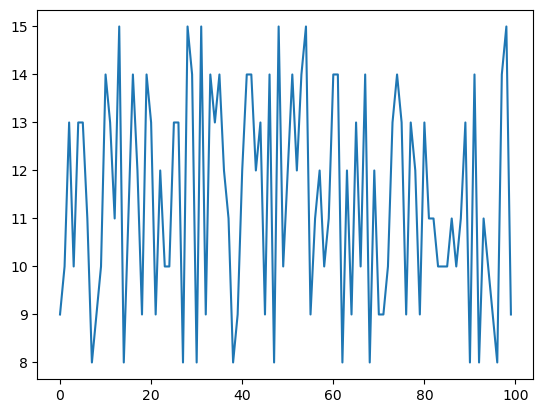

In [20]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

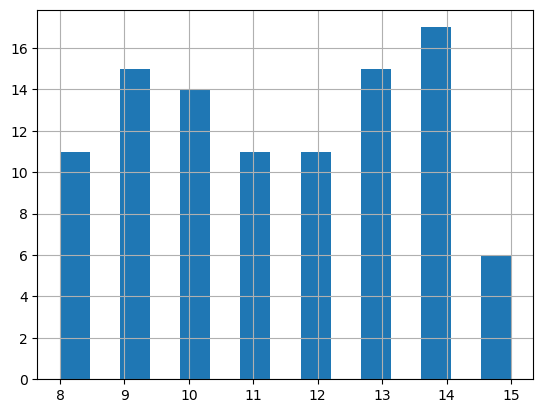

In [22]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [38]:
df.國文.mean()

11.39

算標準差。

In [40]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [58]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [56]:
df = df.select_dtypes(include='number')  # 篩選數值欄位
print(df)

    國文  英文  數學  自然  社會
0    9  10  15  10  13
1   10  10  10   8   9
2   13  15   8  11  14
3   10  10   8   9  14
4   13  12  14  12  13
..  ..  ..  ..  ..  ..
95   9  10   9  13  14
96   8  10  14  10  15
97  14   9  11   8  12
98  15   9   8   9  15
99   9  11  12  12  10

[100 rows x 5 columns]


只算兩科間的相關係數當然也可以。

In [58]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [68]:
df["總級分"]=df.sum(axis=1)
df.head()

,國文,英文,數學,自然,社會,總級分
0,9,10,15,10,13,57
1,10,10,10,8,9,47
2,13,15,8,11,14,61
3,10,10,8,9,14,51
4,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [14]:
df["加權"]=df.國文+df.英文+df.數學*2

In [18]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [24]:
df.sort_values(by="總級分",ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,52
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,48
25,蔡亦瑄,13,13,14,13,12,65,54
57,胡淳茜,12,15,14,13,11,65,55
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
64,俞志峰,9,14,13,14,15,65,49
83,李士賢,10,14,15,13,13,65,54
87,趙偉希,10,13,14,13,15,65,51


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [30]:
df2=df.sort_values(by=["加權","總級分"],ascending=False)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,55
36,詹威德,12,13,15,10,14,64,55
25,蔡亦瑄,13,13,14,13,12,65,54
83,李士賢,10,14,15,13,13,65,54
...,...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,51,36
84,胡凱琳,10,8,9,9,15,51,36
32,林建亨,9,11,8,8,11,47,36
18,梁慧君,9,8,8,8,12,45,33


### 【重點】重設 index

In [34]:
df2.index=range(1,101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [36]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
3,詹威德,12,13,15,10,14,64,55
5,李士賢,10,14,15,13,13,65,54
7,曾怡君,11,12,15,13,14,65,53
10,林哲法,14,9,15,10,14,62,53
13,陳竹伯,10,12,15,10,14,61,52
15,葉儀依,9,13,15,8,14,59,52
18,周育霖,9,12,15,13,12,61,51
21,張雅彬,10,11,15,12,8,56,51
22,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [48]:
df2[(df2.數學 == 15) & (df2.英文 == 15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [40]:
df2.drop("總級分",axis=1)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54
...,...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,51,36
97,胡凱琳,10,8,9,9,15,51,36
98,林建亨,9,11,8,8,11,47,36
99,梁慧君,9,8,8,8,12,45,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [72]:
df2.drop("總級分",axis=1,inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [78]:
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [47]:
df2.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [80]:
df2.drop(df2[df2.姓名=="李士賢"].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [117]:
!pip install yfinance
import yfinance as yf
df = yf.download("AAPL", start="2022-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [119]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,179.076584,179.932572,174.845898,174.963959,104487900
2022-01-04,176.803802,179.991589,176.233148,179.686588,99310400
2022-01-05,172.100845,177.266232,171.825359,176.715260,94537600
2022-01-06,169.227905,172.474723,168.873707,169.916620,96904000
2022-01-07,169.395187,171.333439,168.273561,170.103585,86709100


#### 只要最後 300 個交易日!

In [121]:
df=df[-300:]
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-10-20,141.662811,144.132698,140.931719,141.297273,64522000
2022-10-21,145.496078,146.069094,140.931718,141.149069,86548600
2022-10-24,147.649811,148.420414,144.241370,145.417039,75981900
2022-10-25,150.504990,150.653192,147.560889,148.282092,74732300
2022-10-26,147.551025,150.159225,146.256792,149.141633,88194300
...,...,...,...,...,...
2023-12-22,192.656174,194.457347,192.029240,194.228458,37122800
2023-12-26,192.108856,192.944757,191.889928,192.666124,28919300


#### 20 日的移動平均

<Axes: xlabel='Date'>

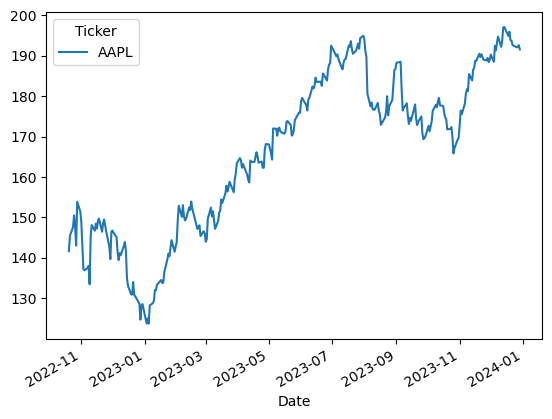

In [123]:
df.Close.plot()

<Axes: xlabel='Date'>

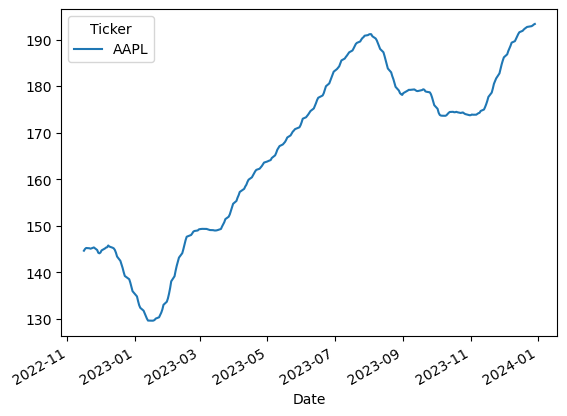

In [125]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

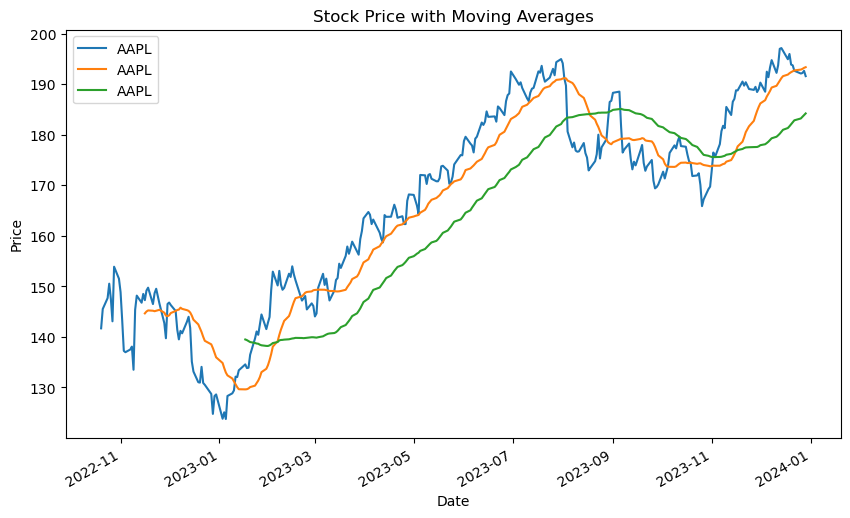

In [127]:
import matplotlib.pyplot as plt

# 創建畫布
fig, ax = plt.subplots(figsize=(10, 6))  # 設定圖形大小

# 畫出原始收盤價
df.Close.plot(ax=ax, label="Close Price")

# 畫出 20 日移動平均線
df.Close.rolling(20).mean().plot(ax=ax, label="$MA_{20}$")

# 畫出 60 日移動平均線
df.Close.rolling(60).mean().plot(ax=ax, label="$MA_{60}$")

# 顯示圖例
ax.legend()

# 設置標題與軸標籤
ax.set_title("Stock Price with Moving Averages")
ax.set_xlabel("Date")
ax.set_ylabel("Price")

# 顯示圖表
plt.show()

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [129]:
close=df.Close.values
len(close)

300

In [133]:
x=close[:-1]
len(x)

299

In [135]:
y=close[1:]
len(y)

299

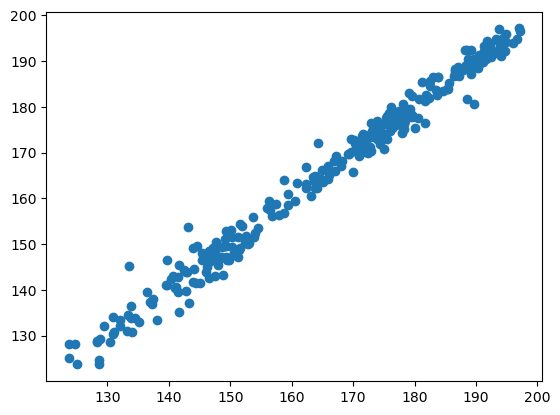

In [137]:
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [139]:
mydata = np.random.randn(4,3)

In [141]:
mydata

array([[ 1.04005418, -0.69115616,  1.0049411 ],
       [ 0.74847182,  1.61967399, -1.55491771],
       [-1.5129866 ,  0.13051244, -2.41220853],
       [ 0.20107547, -0.84510765, -0.51649785]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [143]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [145]:
df2

,A,B,C
0,1.040054,-0.691156,1.004941
1,0.748472,1.619674,-1.554918
2,-1.512987,0.130512,-2.412209
3,0.201075,-0.845108,-0.516498


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [147]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [149]:
df3

,A,B,C
0,0.077855,-0.18672,1.482948
1,0.309252,-1.25499,0.546911
2,1.612654,-0.05912,-0.727006


In [153]:
df4=pd.concat([df2,df3],axis=0)

In [155]:
df4

,A,B,C
0,1.040054,-0.691156,1.004941
1,0.748472,1.619674,-1.554918
2,-1.512987,0.130512,-2.412209
3,0.201075,-0.845108,-0.516498
0,0.077855,-0.186720,1.482948
1,0.309252,-1.254990,0.546911
2,1.612654,-0.059120,-0.727006


前面我們弄得亂七八糟的 index 重設一下。

In [157]:
df4.index=range(7)

In [159]:
df4

,A,B,C
0,1.040054,-0.691156,1.004941
1,0.748472,1.619674,-1.554918
2,-1.512987,0.130512,-2.412209
3,0.201075,-0.845108,-0.516498
4,0.077855,-0.186720,1.482948
5,0.309252,-1.254990,0.546911
6,1.612654,-0.059120,-0.727006


#### 横向的貼

In [161]:
df4=pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [163]:
df4

,A,B,C,A,B,C
0,1.040054,-0.691156,1.004941,0.077855,-0.18672,1.482948
1,0.748472,1.619674,-1.554918,0.309252,-1.25499,0.546911
2,-1.512987,0.130512,-2.412209,1.612654,-0.05912,-0.727006
3,0.201075,-0.845108,-0.516498,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [197]:
df_names=pd.read_csv("data/names.csv",names=["姓名"])
df_grades=pd.read_csv("data/grade2.csv")

In [199]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [171]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [193]:
df_grades

,國文,英文,數學,社會,自然
0,13,7,13,14,15
1,14,13,13,10,8
2,15,14,11,6,11
3,9,15,8,8,11
4,12,11,9,7,9
...,...,...,...,...,...
95,10,7,11,7,6
96,13,11,12,14,14
97,11,10,14,15,13
98,14,12,9,6,13


In [183]:
df_grades.to_csv("data/grade2.csv",index=0)

In [201]:
df_x=pd.concat([df_names,df_grades],axis=1)

In [203]:
df_x

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,13,7,13,14,15
1,王紹尹,14,13,13,10,8
2,黃季坤,15,14,11,6,11
3,許正書,9,15,8,8,11
4,張鈞蓮,12,11,9,7,9
...,...,...,...,...,...,...
95,陳君生,10,7,11,7,6
96,曾桂甫,13,11,12,14,14
97,林欣怡,11,10,14,15,13
98,林佳霖,14,12,9,6,13
